In [1]:
from trains import Task

In [2]:
task = Task.init(project_name="Project_1", task_name="sk_task1")

TRAINS Task: overwriting (reusing) task id=8c7b76a750554a369a9e72c073f20b94
2019-06-24 00:18:57,344 - trains.Task - WARNING - Failed auto-detecting task repository: expected one of: git environment, hg environment, hg, git
TRAINS results page: https://demoapp.trainsai.io/projects/8d1ad3e378654ad69f8229f56ac50412/experiments/8c7b76a750554a369a9e72c073f20b94/output/log


In [3]:
# Trains - Example of integrating plots and training on jupyter notebook. 
# In this example, simple graphs are shown, then an MNIST classifier is trained using Keras.

from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
# Set script parameters
task_params = {'num_scatter_samples': 50, 'sin_max_value': 30, 'sin_steps': 25}
task_params = task.connect(task_params)

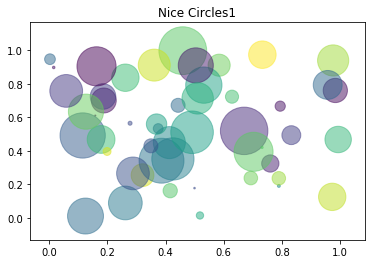

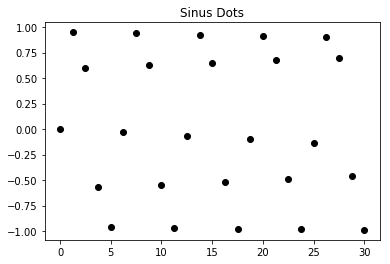

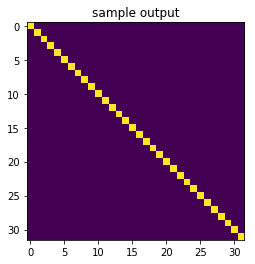

In [5]:
%matplotlib inline
N = task_params['num_scatter_samples']
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (50 * np.random.rand(N))**2  # 0 to 15 point radii
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Nice Circles1')
plt.show()

x = np.linspace(0, task_params['sin_max_value'], task_params['sin_steps'])
y = np.sin(x)
plt.plot(x, y, 'o', color='black')
plt.title('Sinus Dots')
plt.show()

m = np.eye(32, 32, dtype=np.uint8)
plt.imshow(m)
plt.title('sample output')
plt.show()

In [28]:
# Notice, Updating task_params is traced and updated in TRAINS
task_params['batch_size'] = 128
task_params['nb_classes'] = 10
task_params['nb_epoch'] = 6
task_params['hidden_dim'] = 512
batch_size = task_params['batch_size']
nb_classes = task_params['nb_classes']
nb_epoch = task_params['nb_epoch']


In [27]:
print('batch_size' , batch_size,'nb_classes' , nb_classes,'nb_epoch' , nb_epoch)

batch_size 128 nb_classes 10 nb_epoch 6


In [29]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.
X_test /= 255.
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

hidden_dim = task_params['hidden_dim']
model1 = Sequential()
model1.add(Dense(hidden_dim, input_shape=(784,)))
model1.add(Activation('relu'))
# model.add(Dropout(0.2))
model1.add(Dense(hidden_dim))
model1.add(Activation('relu'))
# model.add(Dropout(0.2))
model1.add(Dense(10))
model1.add(Activation('softmax'))

model1.summary()

model1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

board = TensorBoard(histogram_freq=1, log_dir='/tmp/histogram_example')
model1_store = ModelCheckpoint(filepath='/tmp/weight.{epoch}.hdf5')

model1.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=nb_epoch,
                    callbacks=[board, model_store],
                    verbose=1, validation_data=(X_test, Y_test))
score = model1.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 512)               401920    
_________________________________________________________________
activation_22 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_23 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                5130      
_________________________________________________________________
activation_24 (Activation)   (None, 10)                0         
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_______________________________

InvalidArgumentError: You must feed a value for placeholder tensor 'dense_19_input' with dtype float and shape [?,784]
	 [[node dense_19_input (defined at /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517) ]]

Caused by op 'dense_19_input', defined at:
  File "/anaconda3/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/anaconda3/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/anaconda3/lib/python3.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/anaconda3/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/anaconda3/lib/python3.7/site-packages/tornado/ioloop.py", line 831, in start
    self._run_callback(callback)
  File "/anaconda3/lib/python3.7/site-packages/tornado/ioloop.py", line 604, in _run_callback
    ret = callback()
  File "/anaconda3/lib/python3.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 1104, in <lambda>
    self.future, lambda f: self.run())
  File "/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 1024, in run
    yielded = self.gen.send(value)
  File "/anaconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 285, in wrapper
    yielded = next(result)
  File "/anaconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 285, in wrapper
    yielded = next(result)
  File "/anaconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 285, in wrapper
    yielded = next(result)
  File "/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/anaconda3/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2819, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2845, in _run_cell
    return runner(coro)
  File "/anaconda3/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3020, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3185, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-26-0153e88b9ac4>", line 19, in <module>
    model.add(Dense(hidden_dim, input_shape=(784,)))
  File "/anaconda3/lib/python3.7/site-packages/keras/engine/sequential.py", line 161, in add
    name=layer.name + '_input')
  File "/anaconda3/lib/python3.7/site-packages/keras/engine/input_layer.py", line 178, in Input
    input_tensor=tensor)
  File "/anaconda3/lib/python3.7/site-packages/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/anaconda3/lib/python3.7/site-packages/keras/engine/input_layer.py", line 87, in __init__
    name=self.name)
  File "/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py", line 517, in placeholder
    x = tf.placeholder(dtype, shape=shape, name=name)
  File "/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/array_ops.py", line 2077, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/gen_array_ops.py", line 5791, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/anaconda3/lib/python3.7/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 3300, in create_op
    op_def=op_def)
  File "/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'dense_19_input' with dtype float and shape [?,784]
	 [[node dense_19_input (defined at /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517) ]]


In [31]:
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics 

In [34]:
!pip3 install -U xgboost

Requirement already up-to-date: xgboost in /usr/local/lib/python3.7/site-packages (0.90)


In [35]:
import xgboost
model_h = xgboost.XGBRegressor(n_estimators=70, learning_rate=0.08, gamma=0, subsample=0.8,
                               colsample_bytree=1, max_depth=10)

ModuleNotFoundError: No module named 'xgboost'

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [10]:
X, y = make_classification(n_samples=1000, n_features=4,
                          n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                            random_state=0)
clf.fit(X, y)  
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
print(clf.feature_importances_)

print(clf.predict([[0, 0, 0, 0]]))

[0.14205973 0.76664038 0.0282433  0.06305659]
[1]


Retrying (Retry(total=239, connect=240, read=239, redirect=240, status=240)) after connection broken by 'ProtocolError('Connection aborted.', OSError("(54, 'ECONNRESET')"))': /v1.9/tasks.get_by_id
Retrying (Retry(total=239, connect=240, read=239, redirect=240, status=240)) after connection broken by 'ProtocolError('Connection aborted.', OSError("(54, 'ECONNRESET')"))': /v1.9/tasks.get_by_id
Retrying (Retry(total=239, connect=240, read=239, redirect=240, status=240)) after connection broken by 'ProtocolError('Connection aborted.', OSError("(54, 'ECONNRESET')"))': /v1.9/tasks.get_by_id
Retrying (Retry(total=239, connect=240, read=239, redirect=240, status=240)) after connection broken by 'ProtocolError('Connection aborted.', OSError("(54, 'ECONNRESET')"))': /v1.9/tasks.get_by_id
Retrying (Retry(total=239, connect=240, read=239, redirect=240, status=240)) after connection broken by 'ProtocolError('Connection aborted.', OSError("(54, 'ECONNRESET')"))': /v1.9/tasks.get_by_id
Retrying (Retry